# Yival Cookbook 👨‍🍳👩‍🍳
Get a taste of Yival's features by using your own startup's headline generating bot!

Simply configure your **OpenAI key** and voila! You'll have access to an endless stream of evaluated and enhanced headline results!

### **What is YiVal?**
> YiVal is a versatile platform support customize test data, evaluation methods and enhancement strategy , all in one.
It enpowers you to generate better results, reduce latency and decrease inference cost.

**~~TL~~DR**: YiVal streamlines the **evaluation** and **enhancement** of GenAI Apps, enhance ane evaluate **everything** with ease.

### **Why YiVal**


*   Native support **Multi-modal** apps: text📄 + audio🎙 + image🌃 + video🎥
*   **Multi-components**: which doesn't even have to be GenAI 😁
*   Native **RLHF** and **RLAIF** ⚙️
*   Most advanced open source **enhancement algorithms** 🪄



### **Headline Generation Demo**


*   Background: AIGC editors spend much time adjusting prompts without a systematic evaluation method.
*   Business Usage: Support AIGC content editors in generating a variety of prompts, automatically **generating**, **filtering**, **evaluating**, and **enhancing** quality.
*   Goal: Automatically generate & enhance prompts,adjust parameters, and support the large-scale export of both the generated headlines and their corresponding evaluation results.

**Here are headlines that our generation bot created for Yival in interactive mode!**😆


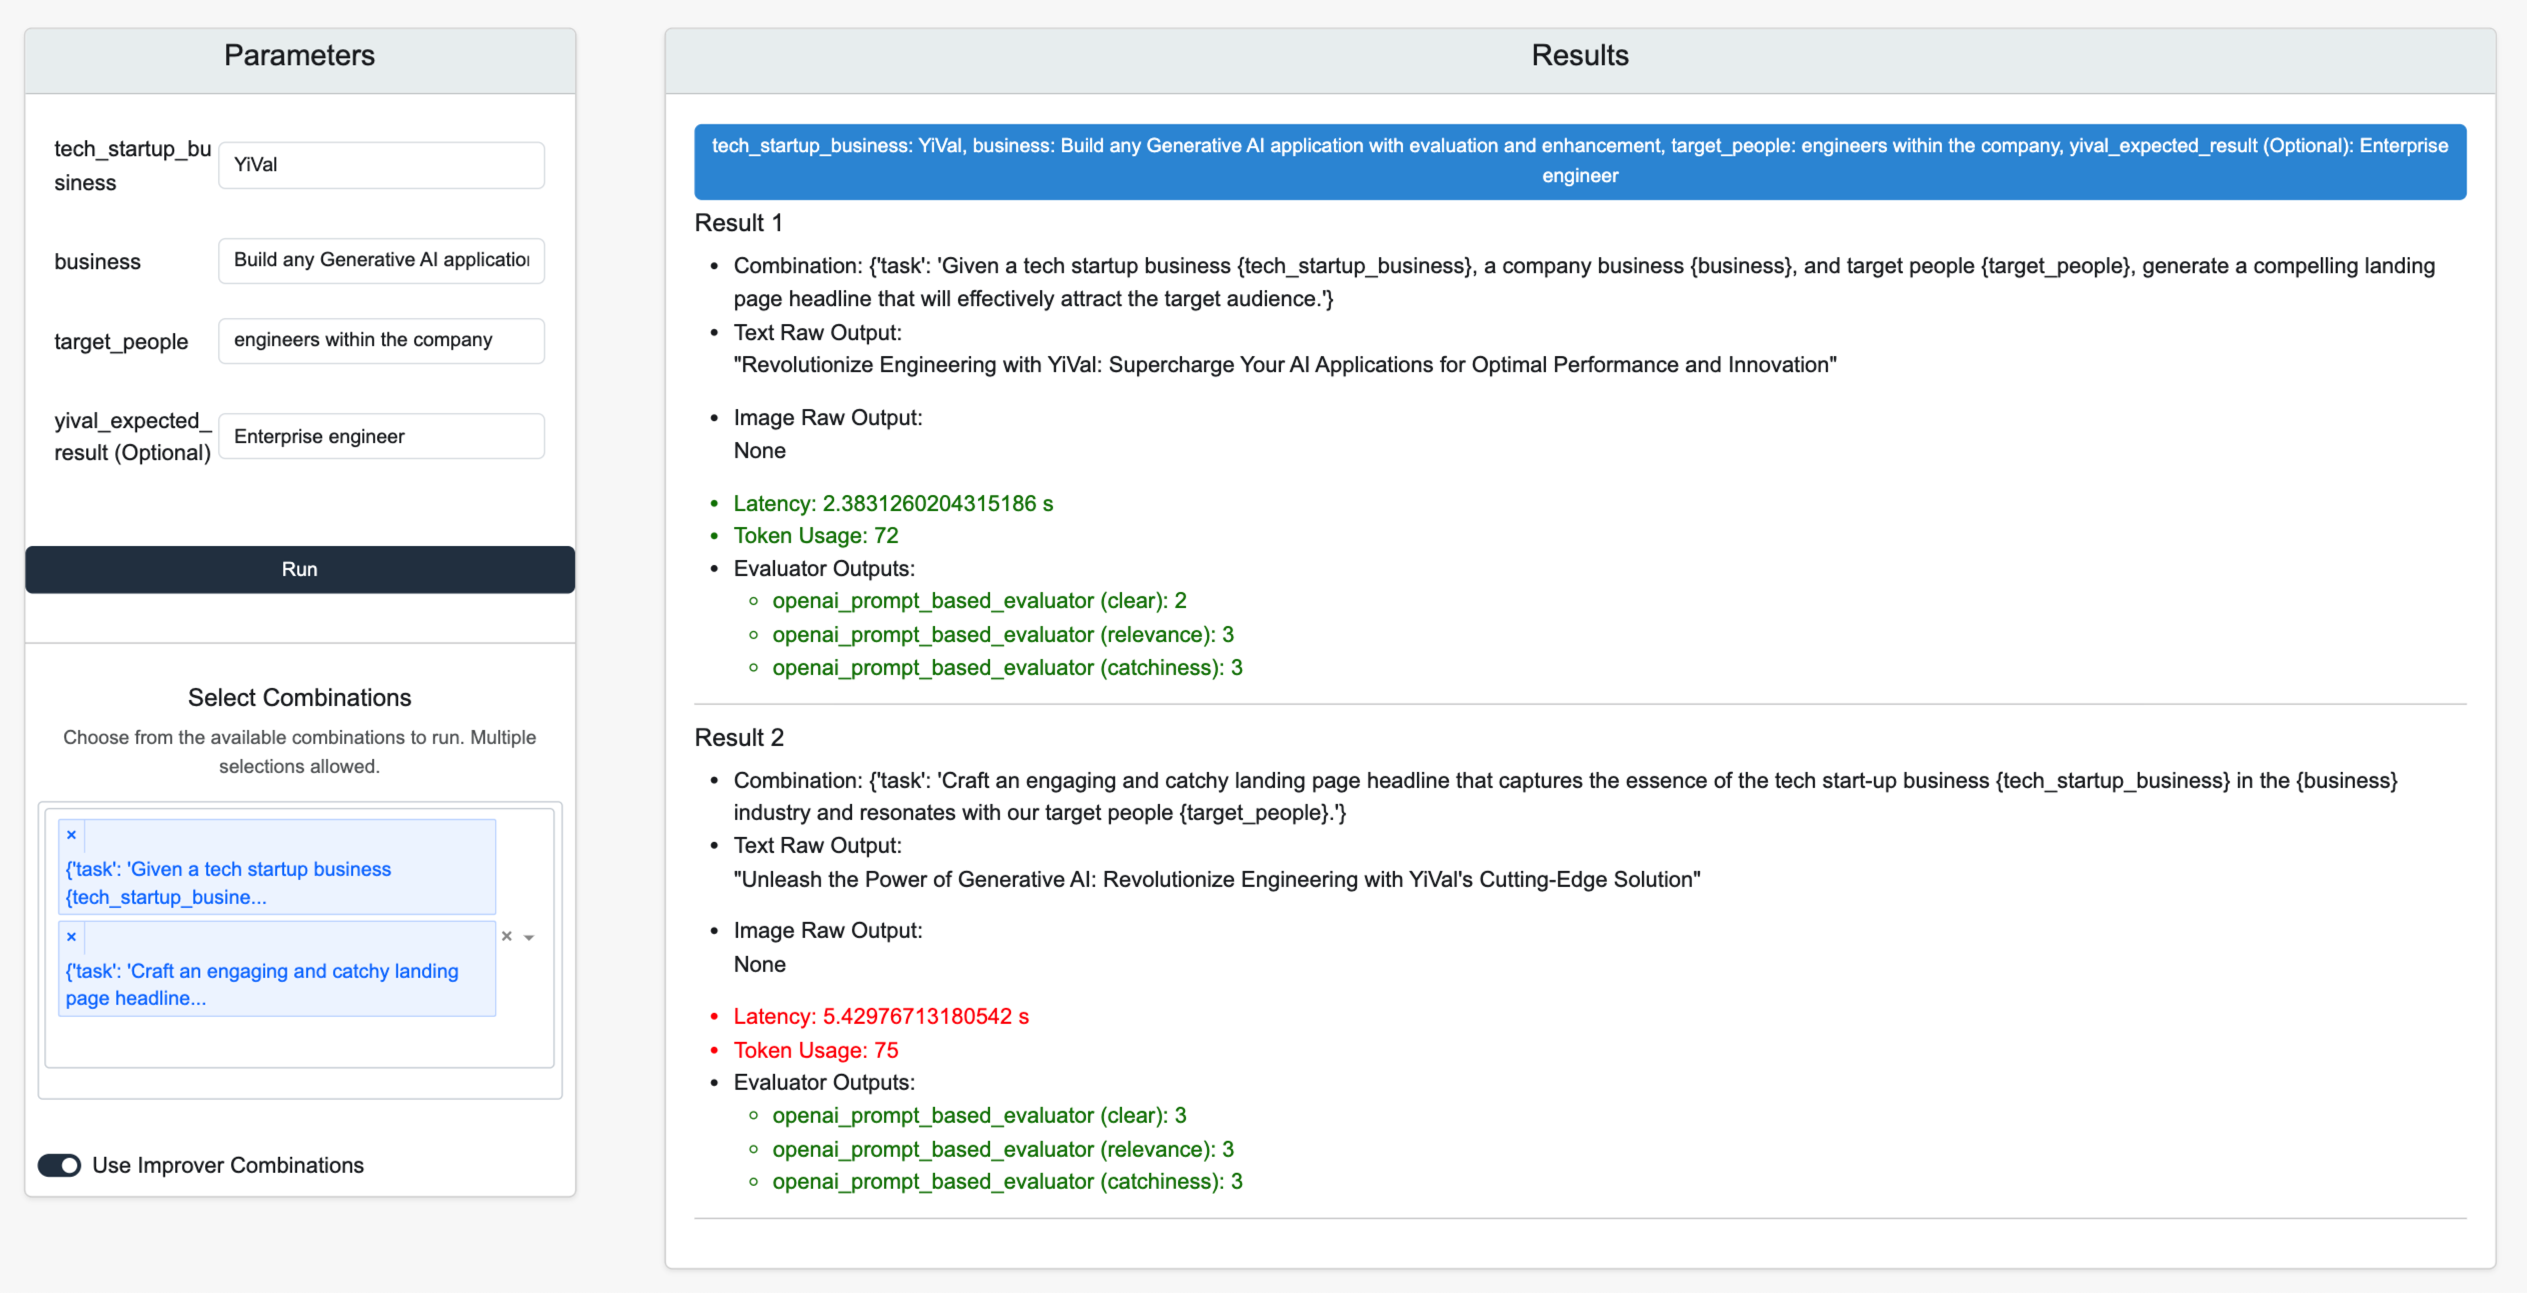

With yival's incrediable ability to streamlines the evaluation and enhancement of AIGC:
* This demo can save AIGC media editors **75%** of their time 🕒.
* Using **200** data points generated by GPT-4 for evaluation, after three rounds of enhancement

  **Higer quality**
  * The **Clear** score of the headline, as automatically evaluated automatic evaluation increased from **2.58** to **3.48**  ( **36%++**)
  * The **Relevance** score of the headline, as automatically evaluated automatic evaluation increased from **2.66** to **3.37**  ( **27%++**)
  * The **Catchiness** score of the headline, as automatically evaluated automatic evaluation increased from **2.46** to **3.32**  ( **34%++**)
  * The human-evaluated comprehensibility increased from **3.41** to **4.25** (**25%++**)

  **Lower Costs**
  * The **Average Token usage** decreased from **137** to **115**  ( **16%--**)
  * The **Average latency** decreased from  **4.38** to **3.79**  ( **13%--**)

# **Install the latest yival with git**

We provide two ways of yival install

1. install with pip
```
pip install yival
```

2. Developer Mode: The latest yival
```
git clone https://github.com/YiVal/YiVal.git
poetry config virtualenvs.create true
poetry install
```

here we install with poetry , you can find the detail below
* install poetry in colab environment
* install yival with poetry

In [ ]:
# clone the latest yival
import os
!python --version
!rm -rf YiVal
!git clone -b stable https://github.com/YiVal/YiVal.git

# install and config poetry
import shutil
!pip install poetry
POETRY_PATH = shutil.which("poetry") or (os.getenv("HOME") + "/.local/bin/poetry")
os.environ["PATH"] += os.pathsep + os.path.dirname(POETRY_PATH)
!poetry --version
!poetry config virtualenvs.create true

In [ ]:
os.chdir("/content/YiVal")
!poetry install --no-ansi

In [ ]:
!pip install openai requests

# **Configure your OpenAI API key**

In yival, most of time we will use chatgpt as data_generator, evaluator , improver...

It's really amazing to find that llm is so powerful

In some of the demos provided by Yival, we use GPT-4 for data generation, result evaluation, and so on, because GPT-4 has stronger **reasoning** capabilities.



In [ ]:
os.environ['OPENAI_API_KEY']= ''

# **[Optional] Change gpt-4 to gpt-3.5-turbo in config**

If you don't have a GPT-4 account, you can also use GPT-3.5-turbo to complete the entire process, you just need to modify the **model_name** in the config file.

For example , you can find `model_name` below

```yaml
description: Generate test data
dataset:
  data_generators:
    openai_prompt_data_generator:
      chunk_size: 100000
      diversify: true
      model_name: gpt-4 #Change the model_name to gpt-3.5-turbo here 🦄️
      input_function:
        description:
          Given a tech startup business, generate a corresponding landing
          page headline
        name: headline_generation_for_business
        parameters:
          tech_startup_business: str
      number_of_examples: 3
      output_csv_path: generated_examples.csv
  source_type: machine_generated
```

If you want to use gpt-3.5-turbo, change the `use_gpt_35_turbo` to `True` in the below cell and run it.

It will autotimatically replace all `gpt-4` to `gpt-3.5-turbo` in all yamls provided by yival

In [ ]:
import os, glob, yaml
use_gpt_35_turbo = True  #change it to True if you don't want to use gpt-4

def replace_gpt4_recursive(data):
    if isinstance(data, str):
        return data.replace('gpt-4', 'gpt-3.5-turbo')
    elif isinstance(data, list):
        return [replace_gpt4_recursive(item) for item in data]
    elif isinstance(data, dict):
        return {key: replace_gpt4_recursive(value) for key, value in data.items()}
    else:
        return data

def replace_in_yaml_files(directory):
    for filename in glob.glob(os.path.join(directory, '*.yml')):
        with open(filename, 'r') as file:
            data = yaml.safe_load(file)
        data = replace_gpt4_recursive(data)
        with open(filename, 'w') as file:
            yaml.safe_dump(data, file)

if use_gpt_35_turbo:
  replace_in_yaml_files("/content/YiVal/demo/configs")
  print("[INFO] replace all gpt-4 to gpt-3.5-turbo. Use gpt-3.5-turbo in the coming page")
else:
  print("[INFO] use default gpt-4")


# **Headline Generation Bot 🐤TuToRiAl🐤**

We will use chatgpt in this demo, and the following yival components

* Data Generator
* Different vairations
* Evaluators
* Human rating
* Selection strategy
* Enhancer

Please note that although I will list some configuration files separately to **demonstrate the effect**, in reality, you only need to run **a complete yaml configuration file** to fully operate the yival pipeline.

The big picture can be seen below.

👾 Take a deep breath and let's solve our problems step-by-step 👾


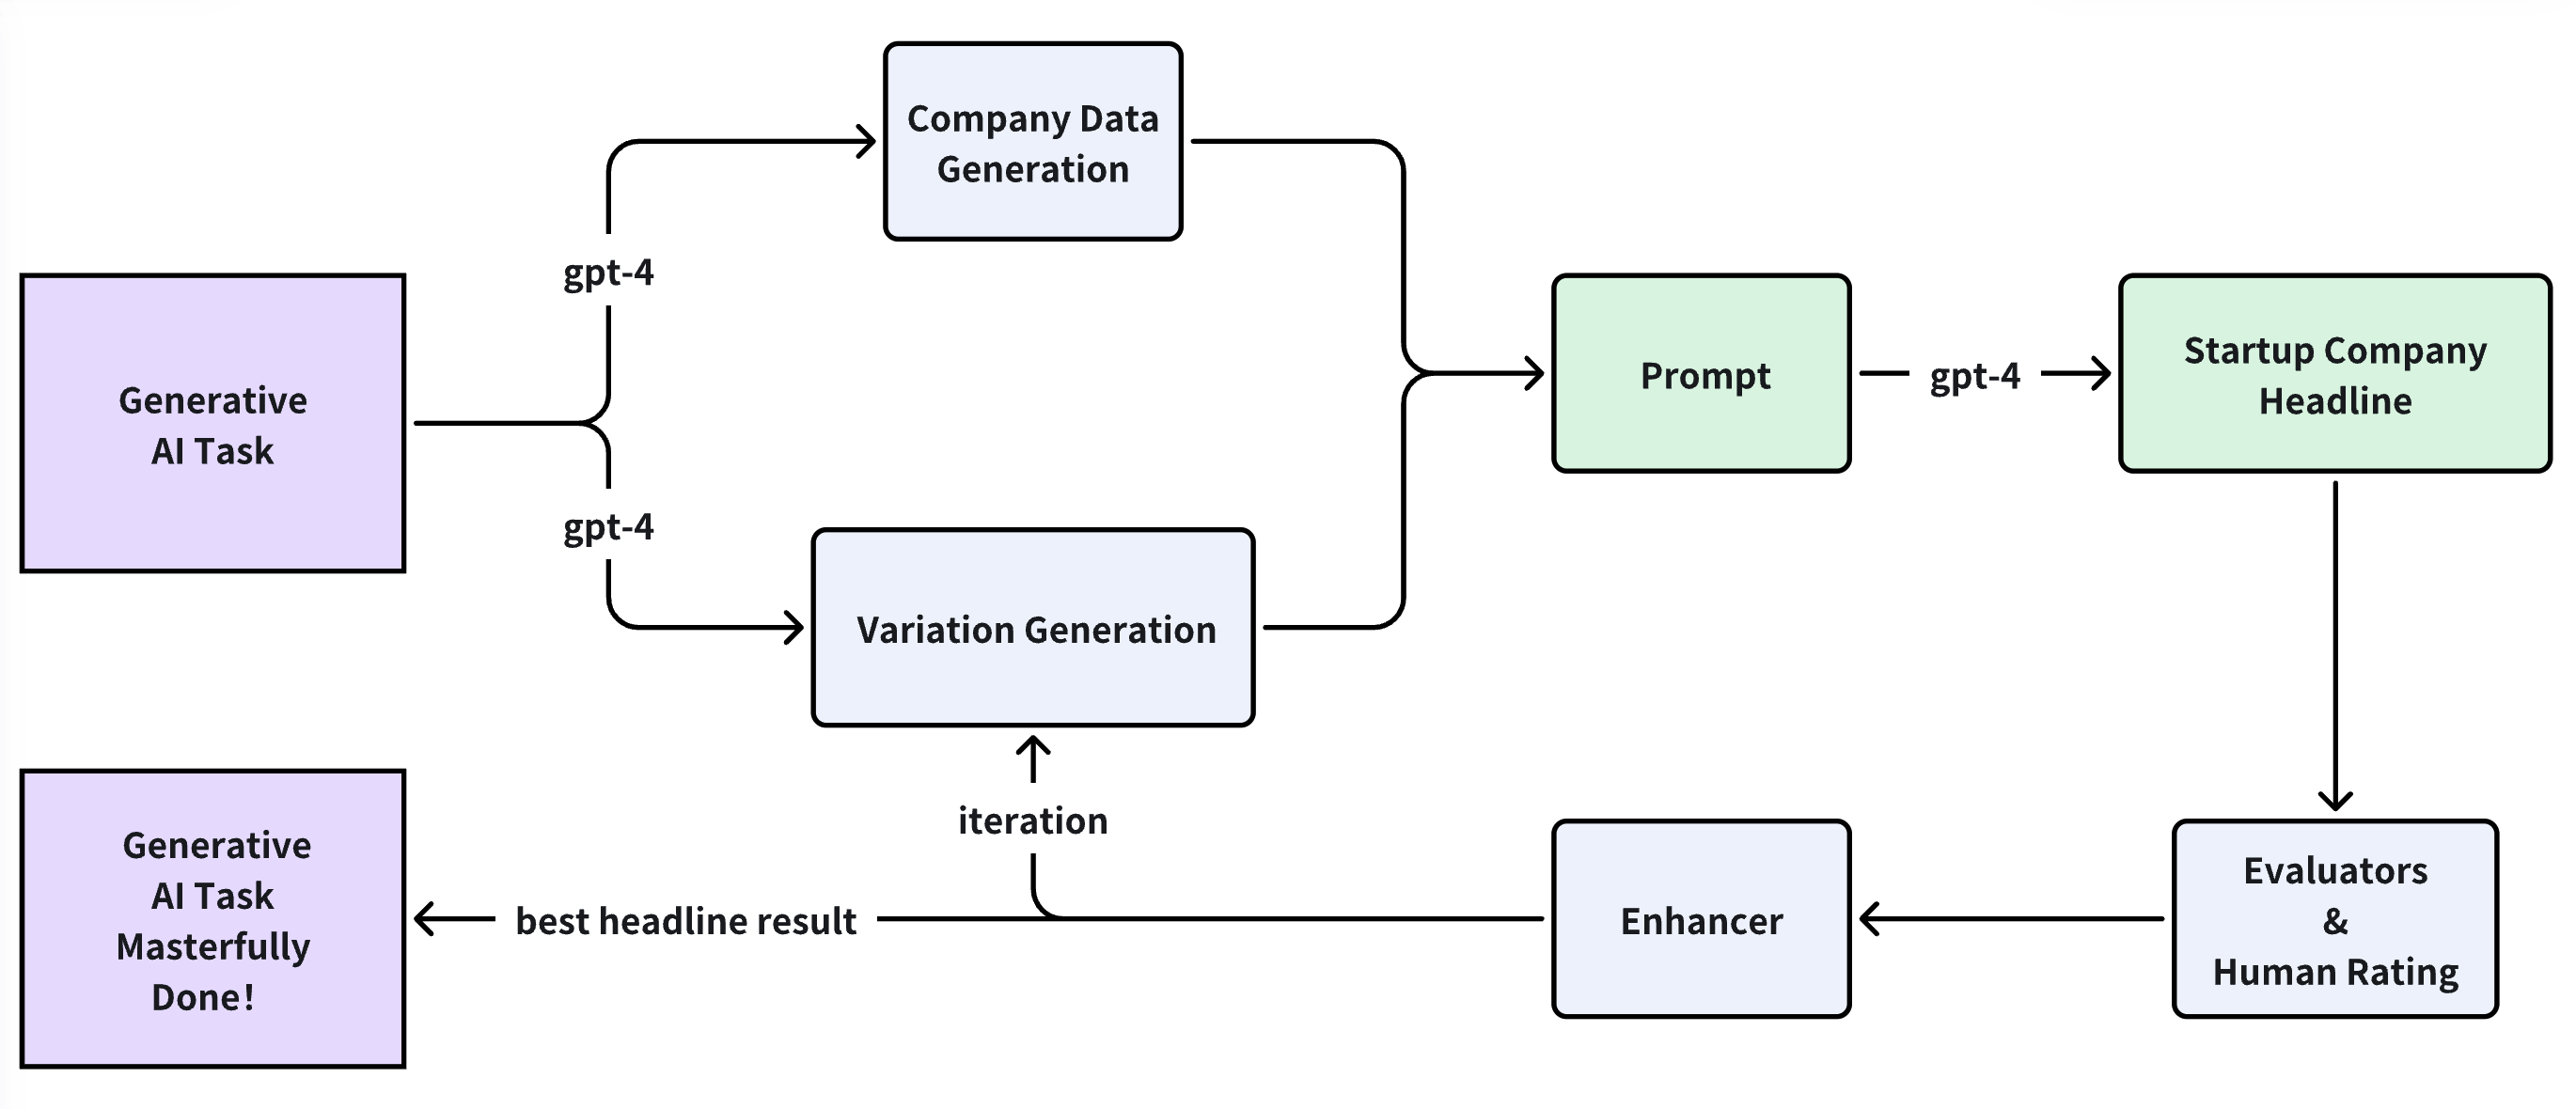

## **Data Generator**

The following is the configuration for data generation.

Here we use openai_prompt_data_generator to generate the input of our custom function.

Notice that you only need to describe the function's purpose and input parameters, and the openai_prompt_data_generator can automatically generate a variety of data for you.

```yaml
description: Generate data with openai_prompt_data_generator
dataset:
  data_generators:
    openai_prompt_data_generator:
      chunk_size: 100000
      diversify: true
      # model_name specify the llm model , e.g. a16z-infra/llama-2-13b-chat:9dff94b1bed5af738655d4a7cbcdcde2bd503aa85c94334fe1f42af7f3dd5ee3
      model_name: gpt-4
      prompt:
          "Please provide a concrete and realistic test case as a dictionary for function invocation using the ** operator.
          Only include parameters, excluding description and name.
          Ensure it's succinct and well-structured.
          **Only provide the dictionary.**"
      input_function:
        description:
          "Given a tech startup business named [tech_startup_business], specializing in [business], and target_peopleing [target_people], generate a corresponding landing page headline."
        name: headline_generation_for_business
        parameters:
          tech_startup_business: str
          business: str
          target_people: str
      number_of_examples: 3
      output_path: headline_generate.csv
  source_type: machine_generated
```

Run the cell below to generate data and visualize it.

In [ ]:
import os, glob, yaml
yaml_content = '''
description: Generate data with openai_prompt_data_generator
dataset:
  data_generators:
    openai_prompt_data_generator:
      chunk_size: 100000
      diversify: true
      # model_name specify the llm model , e.g. a16z-infra/llama-2-13b-chat:9dff94b1bed5af738655d4a7cbcdcde2bd503aa85c94334fe1f42af7f3dd5ee3
      model_name: gpt-4
      prompt:
          "Please provide a concrete and realistic test case as a dictionary for function invocation using the ** operator.
          Only include parameters, excluding description and name.
          Ensure it's succinct and well-structured.
          **Only provide the dictionary.**"
      input_function:
        description:
          "Given a tech startup business named [tech_startup_business], specializing in [business], and target_peopleing [target_people], generate a corresponding landing page headline."
        name: headline_generation_for_business
        parameters:
          tech_startup_business: str
          business: str
          target_people: str
      number_of_examples: 3
      output_path: headline_generate.csv
  source_type: machine_generated
'''

with open('test_data_generator.yaml', 'w') as file:
    file.write(yaml_content)

# Generate data with YiVal
!poetry run yival run test_data_generator.yaml

import chardet
import pandas as pd

with open('headline_generate.csv', 'rb') as f:
    result = chardet.detect(f.read())

with open('headline_generate.csv', 'r', encoding=result['encoding'], errors='ignore') as file:
    data = pd.read_csv(file)

## **Variations**

Variations are really important in yival , different variations means different experiment envirionment.

For example, in this case, different variations means different prompt in writing startup company headline according to company name.

Here we use openai_prompt_based_variation_generator to generate different prompts.

```yaml
variations:
  - name: task
    variations:
      - instantiated_value: Generate landing page headline for {tech_startup_business}, company business is {business}, target_people is {target_people}
        value: Generate landing page headline for {tech_startup_business}, company business is {business}, target_people is {target_people}
        value_type: str
        variation_id: null
    generator_name: openai_prompt_based_variation_generator
    generator_config:
     #model_name specify the llm model , e.g. a16z-infra/llama-2-13b-chat:9dff94b1bed5af738655d4a7cbcdcde2bd503aa85c94334fe1f42af7f3dd5ee3
      model_name: gpt-4
      number_of_variations: 3
      diversify: false
      variables: null
      prompt:
        - content: |-
            Your objective is to construct a concise instruction prompt for GPT-4.
            Points to emphasize in your instruction:
            - Given an tech startup business,company business and target people, generate one corresponding landing page headline which is really attracting.
            - {tech_startup_business} represent tech startup business the nature of its business
            - {business} represent the nature of company's business
            - {target_people} represent company's target audience
            - keep your output crisp: only the prompt, devoid of any extraneous content.

          role: system
```

Run the below cell to find the var generate results

In [ ]:
code = '''
from yival.schemas.varation_generator_configs import OpenAIPromptBasedVariationGeneratorConfig as VarConfig
from yival.variation_generators.openai_prompt_based_variation_generator import OpenAIPromptBasedVariationGenerator as VarGenerator
from pprint import pprint

config = VarConfig(
    model_name="gpt-4",
    number_of_variations=3,
    diversify=False,
    max_tokens=2000,
    variables=None,
    prompt="""
            Your objective is to construct a concise instruction prompt for GPT-4.
            Points to emphasize in your instruction:
            - Given an tech startup business,company business and target people, generate one corresponding landing page headline which is really attracting.
            - {tech_startup_business} represent tech startup business the nature of its business
            - {business} represent the nature of company's business
            - {target_people} represent company's target audience
            - keep your output crisp: only the prompt, devoid of any extraneous content.
    """,
)

generator = VarGenerator(config)
results = generator.generate_variations()
for item in results:
    for var in item:
        pprint(var.asdict().get('value',None))
        print()
'''

with open('test_variation_generator.py', 'w') as file:
    file.write(code)

!poetry run python test_variation_generator.py

## **Custom Func**

In this demo, we will first use the tech_startup_business, business, and target_people generated by the Data Generator to instantiate the prompt in the variation.

Then, we will use this prompt to request a headline from ChatGPT.



We will show you the whole pipeline below ~

Feel free to edit parameters `tech_startup_business`, `business`, `target_people` and have fun~

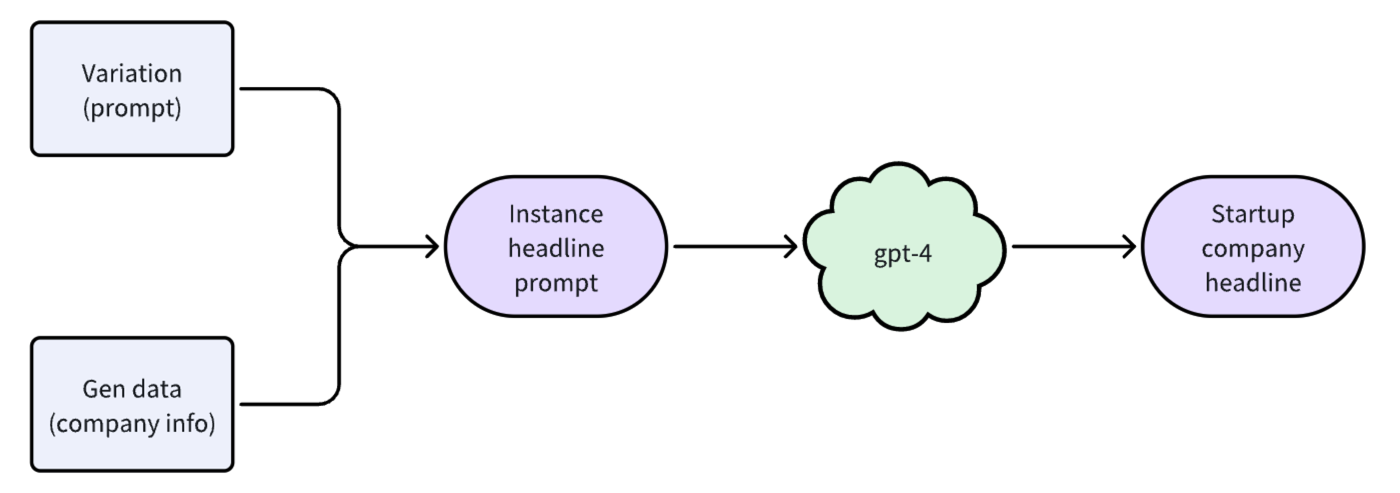

In [ ]:
import os
import openai
from urllib.request import urlopen
from io import BytesIO

# Edit tech_startup_business, business and target_people here~
tech_startup_business = 'YiVal',
business = 'Build any Generative AI application with evaluation and enhancement '
target_people = 'enterprise prompt engineers'

variation_prompt = """
            Your objective is to construct a concise instruction prompt for GPT-4.
            Points to emphasize in your instruction:
            - Given an tech startup business,company business and target people, generate one corresponding landing page headline which is really attracting.
            - {tech_startup_business} represent tech startup business the nature of its business
            - {business} represent the nature of company's business
            - {target_people} represent company's target audience
            - keep your output crisp: only the prompt, devoid of any extraneous content.
"""

def headline_generation(tech_startup_business: str, business: str, target_people: str):
    format_prompt = variation_prompt.format(
        tech_startup_business=tech_startup_business, business=business, target_people=target_people
    )

    openai.api_key = os.getenv("OPENAI_API_KEY")
    messages = [{"role": "user", "content": format_prompt}]
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
        temperature=1.0,
        max_tokens=3000
    )
    res = str(response['choices'][0]['message']['content'])
    return res

result = headline_generation(tech_startup_business,business,target_people)
result

## **Evaluator**

Evaluators are really import parts in yival.

According to many [recent studies](https://ar5iv.labs.arxiv.org/html/2305.01937), large language models are human-level evaluators.

For this reason, we provide the OpenAI_prompt_based_generator in Yival, which serves to evaluate generated results through LLM.

In the following cell, you can see the basic construction of the OpenAI_prompt_based_evaluator. We will provide a detailed explanation of the different criteria for LLM and guide LLM in scoring.

```yaml
evaluators:
  - evaluator_type: individual
    metric_calculators:
      - method: AVERAGE
    name: openai_prompt_based_evaluator
    display_name: clear
    prompt: |-
      You are assessing a submitted answer on a given task based on a criterion. Here is the data:
      - Task: Given an tech startup business, generate one corresponding landing page headline
      - Does the headline clearly communicate what the startup does or what problem it solves?
        It should be immediately clear to anyone who reads the headline what the startup's purpose is.
        A lack of clarity can lead to confusion and may discourage potential users or investors.
      [Input]: company name: {tech_startup_business} , company business: {business} , target people: {target_people}
      [Result]: {raw_output}
      Answer the question by selecting one of the following options:
      A It fails to meet the criterion at all.
      B It somewhat meets the criterion, but there is significant room for improvement.
      C It meets the criterion to a satisfactory degree.
      D It meets the criterion very well.
      E It meets the criterion exceptionally well, with little to no room for improvement.
    choices: ["A", "B", "C", "D", "E"]
    # model_name specify the llm model , e.g. a16z-infra/llama-2-13b-chat:9dff94b1bed5af738655d4a7cbcdcde2bd503aa85c94334fe1f42af7f3dd5ee3
    model_name: gpt-4
    description: "evaluate the quality of the landing page headline"
    scale_description: "0-4"
    choice_scores:
      A: 0
      B: 1
      C: 2
      D: 3
      E: 4

  - evaluator_type: individual
    metric_calculators:
      - method: AVERAGE
    name: openai_prompt_based_evaluator
    prompt: |-
      You are assessing a submitted answer on a given task based on a criterion. Here is the data:
      - Task: Given an tech startup business, generate one corresponding landing page headline
      - Is the headline relevant to the target audience? The headline should speak directly to the
        startup's intended users or customers, highlighting the benefits or value proposition that
        the startup offers.
      [Input]: company name: {tech_startup_business} , company business: {business} , target people: {target_people}
      [Result]: {raw_output}
      Answer the question by selecting one of the following options:
      A It fails to meet the criterion at all.
      B It somewhat meets the criterion, but there is significant room for improvement.
      C It meets the criterion to a satisfactory degree.
      D It meets the criterion very well.
      E It meets the criterion exceptionally well, with little to no room for improvement.
    display_name: relevance
    description: Is the headline relevant to the target audience?
    scale_description: "0-4"
    choices: ["A", "B", "C", "D", "E"]
    choice_scores:
      A: 0
      B: 1
      C: 2
      D: 3
      E: 4
  
  - evaluator_type: individual
    metric_calculators:
      - method: AVERAGE
    name: openai_prompt_based_evaluator
    prompt: |-
      You are assessing a submitted answer on a given task based on a criterion. Here is the data:
      - Task: Given an tech startup business, generate one corresponding landing page headline
      - Is the headline catchy or memorable? While it's important to be clear and relevant,
        a good headline should also be engaging and memorable.
        This can help the startup stand out in a crowded market.
      [Input]: company name: {tech_startup_business} , company business: {business} , target people: {target_people}
      [Result]: {raw_output}
      Answer the question by selecting one of the following options:
      A It fails to meet the criterion at all.
      B It somewhat meets the criterion, but there is significant room for improvement.
      C It meets the criterion to a satisfactory degree.
      D It meets the criterion very well.
      E It meets the criterion exceptionally well, with little to no room for improvement.
    display_name: catchiness
    description: Is the headline catchy or memorable?
    scale_description: "0-4"
    choices: ["A", "B", "C", "D", "E"]
    choice_scores:
      A: 0
      B: 1
      C: 2
      D: 3
      E: 4
```

## **Human Rating**

Sometimes we do need people to make assessments, such as when the task difficulty has exceeded the capabilities of LLM, or when it involves images or other modalities.

YiVal further enhances the evaluation process by offering a user-friendly human label UI : )

Developers can easily provide human evaluations and insights, adding a crucial layer of human feedback to refine and fine-tune the generated headlines, ensuring they resonate with the audience.

With following easy config, we will have a nice page for human to evaluate 👻

```yaml
human_rating_configs:
  - name: comprehensibility
    instructions: Rate the degree to which the headline is easy to understand.
    scale: [1, 5]
```

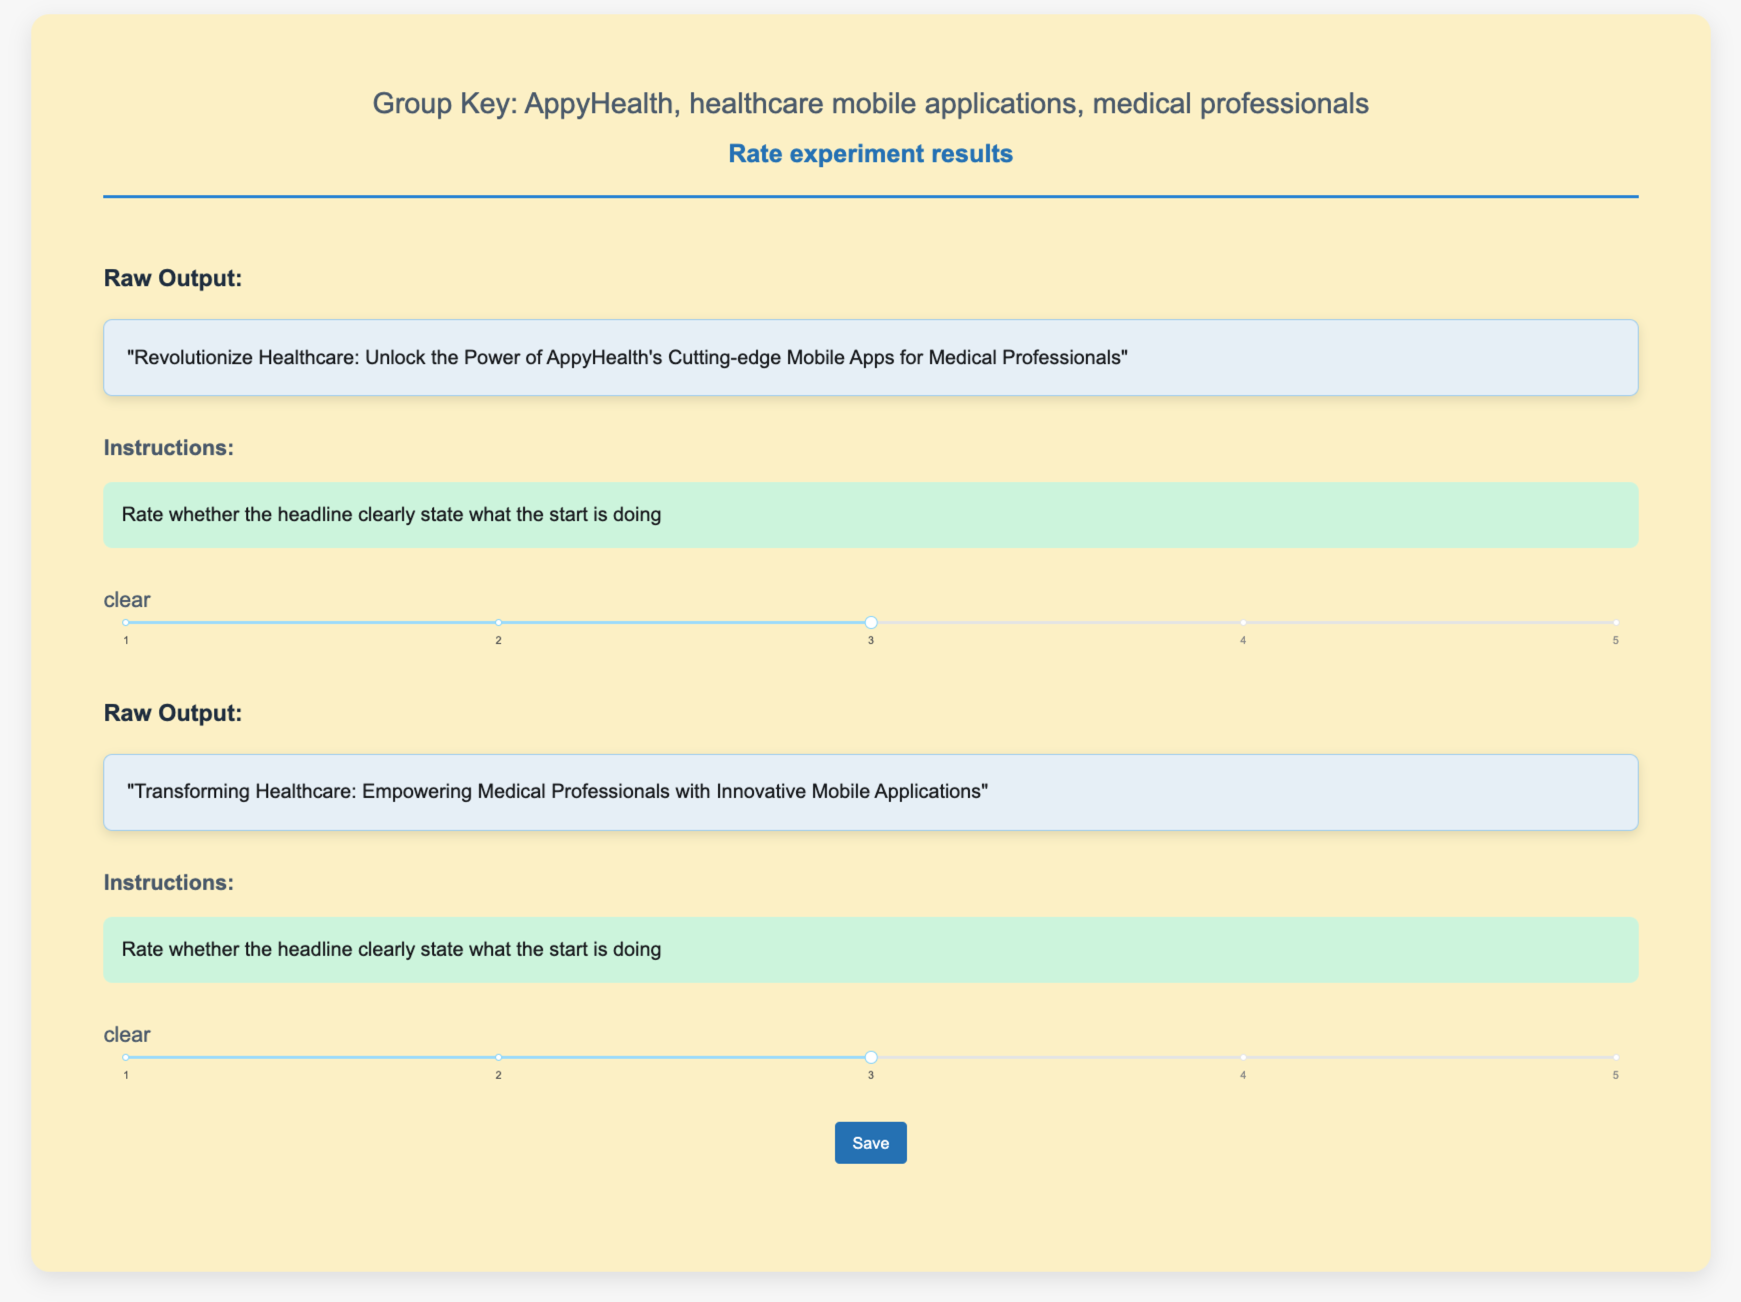

## Selection Strategy

You might have noticed that we support a wide variety of evaluators in Yival configurations 🌟!

In this case, you can assess the results from multiple aspects such as clarify, relevance, catchiness, and also latency, and token_usage... All important factors to consider 🤔.

But of course, we need a selection strategy 🎯 to handle the outputs from various evaluators and pick the best one. In this case, we're using the AHP_strategy with different weights configured ⚖️. Here's a detailed config:

```yaml
selection_strategy:
  ahp_selection:
    criteria:
      - "openai_prompt_based_evaluator: clear"
      - "openai_prompt_based_evaluator: relevance"
      - "openai_prompt_based_evaluator: catchiness"
      - average_token_usage
      - average_latency
    criteria_maximization:
      "openai_prompt_based_evaluator: clear": true
      "openai_prompt_based_evaluator: relevance" : true
      "openai_prompt_based_evaluator: catchiness" : true
      average_latency: false
      average_token_usage: false
    criteria_weights:
      "openai_prompt_based_evaluator: clear": 0.333
      "openai_prompt_based_evaluator: relevance" : 0.333
      "openai_prompt_based_evaluator: catchiness" : 0.333
      average_latency: 0.0
      average_token_usage: 0.0

```

## Enhancer
YiVal means evaluate and enhance!

Enhancer is the enhance part of yival , which is definitely important in yival part.

We have implemented many cutting-edge enhancer algorithms in YiVal.

In this demo, we will be using the [opro_enhancer](https://github.com/YiVal/YiVal/blob/9f76eeebee3a578e80bc84563097ca5c7089661c/src/yival/enhancers/optimize_by_prompt_enhancer.py#L153), which is one of the research achievements of the DeepMind team.

<img width="579" alt="opro" src="https://github.com/crazycth/pictures/assets/55043304/b2589368-caca-4e8a-af5f-f2bcee70d89c">


In opro evolve algorihm, given the meta-prompt as the input , the LLM generates new solutions to our objective function, then new solutions and their scores are added to the meta-prompt for the next step.

YiVal's architecture is perfectly suited for this iterative approach, requiring only a simple configuration file to achieve powerful enhancement.😁

You can find our enhancer config below：
```yaml
enhancer:
  name: "optimize_by_prompt_enhancer"
  model_name: "gpt-4"
  max_iterations: 2
  enhance_var: ["task"]
  head_meta_instruction: |
    Now you will help me generate a prompt which is used to generate a corresponding
    landing page headline according for a startup business named [tech_startup_business],
    specializing in [business], and target_peopleing [target_people].
    I already have some prompt and its evaluation results :
    
  end_meta_instruction: |
    Give me a new prompt that is different from all pairs above, and has a evaluation value higher than any of above.
```

You will witness the incredible power of the enhancer !

Take following picture as an example.

You will find that after each iteration , the evaluation score are getting higher and higher ✈️

`openai_prompt_based_evaluator:clear`: **3.0->3.5->4.0**

`openai_prompt_based_evaluator:relevence`: **3.5->3.5->3.5**

`openai_prompt_based_evaluator:catchiness`: **3.0->2.0->3.0**


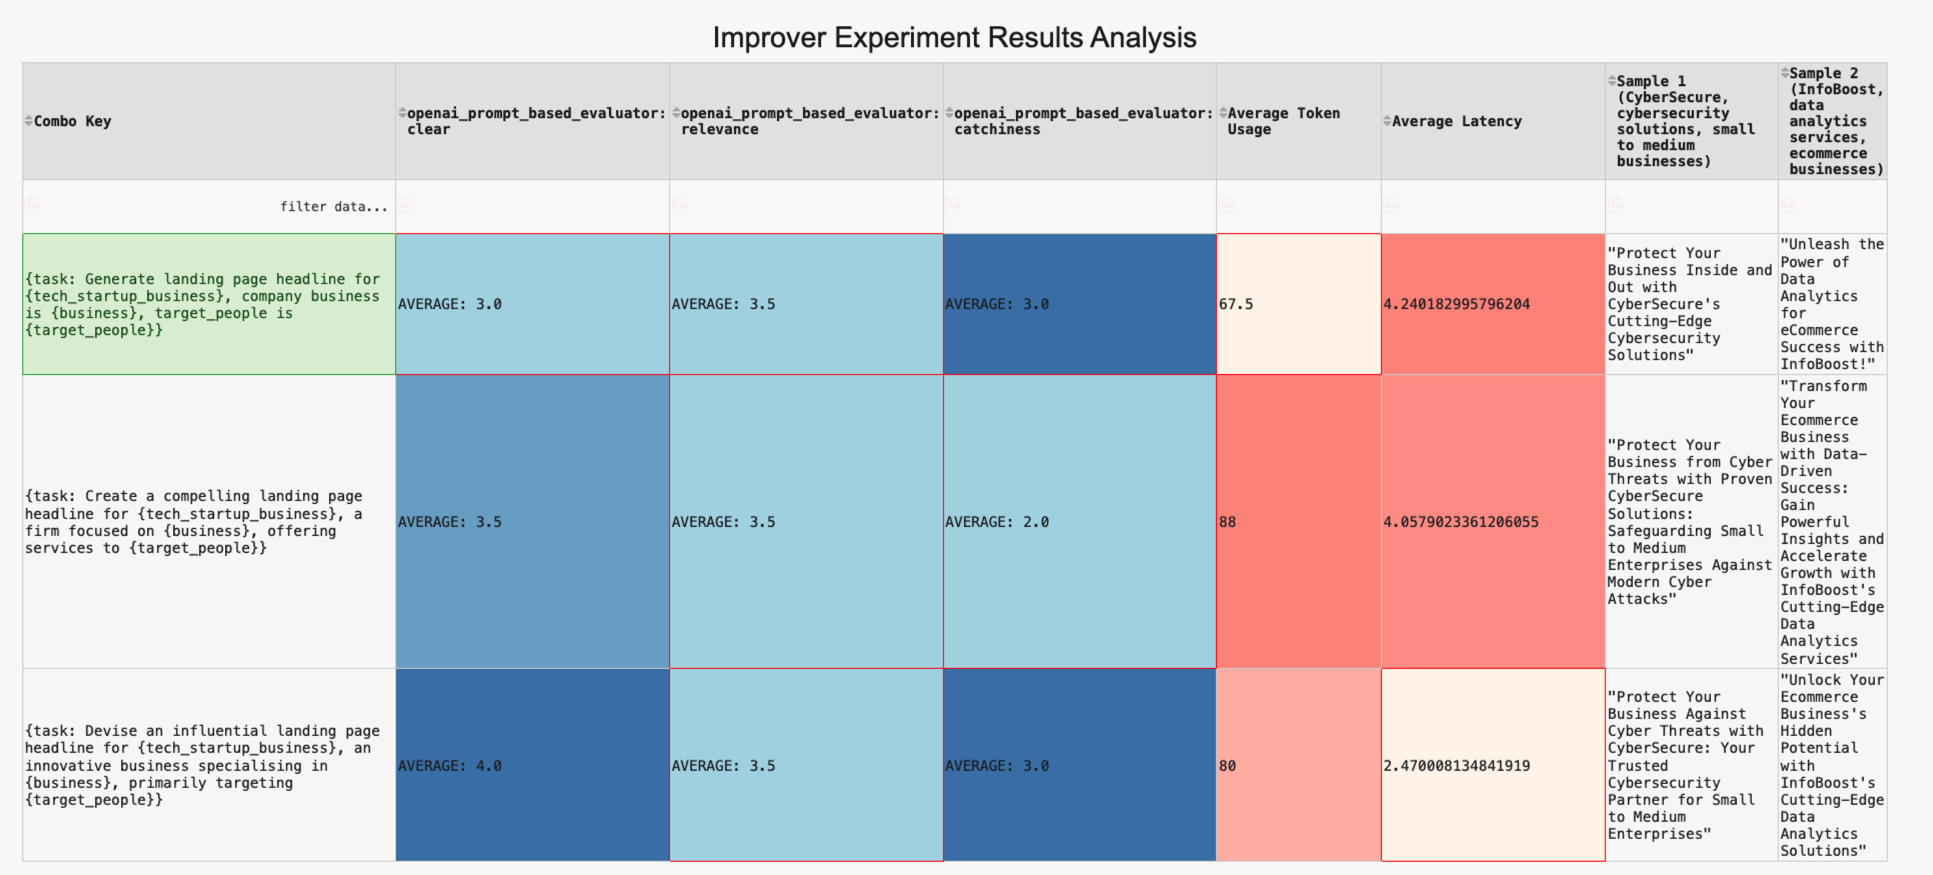

#**[Optional]Configure your Ngrok token**
Our current ngrok authtoken only supports one public session at a time. If it's being used by others or if you're using it to run multiple Colabs at once, you might bump into a Network error. To avoid this, we suggest getting your own ngrok authtoken for your Colab notebooks. It's easy and free to get your own authtoken from ngrok.

Here's how to do it:
- If you don't have a ngrok account yet, head over to https://dashboard.ngrok.com/login to sign up.
- Once you're logged in, you can grab your authtoken at https://dashboard.ngrok.com/get-started/your-authtoken.

Prior to initiating a new demo, ensure that all other applications utilizing ngrok within Colab have been terminated via the `Connect -> Manage Sessions` pathway. You can check and manage your sessions as follow picture.

<img src="https://github.com/uni-zhuan/uni_CDN/blob/master/picture/Yival/iShot_2023-10-12_22.51.49.png?raw=true" width="80%" height="50%">


In [ ]:
!pip install pyngrok
from pyngrok import ngrok

os.environ['ngrok']='true'
public_url = ngrok.connect(addr = 8501)
!poetry run ngrok config add-authtoken 2UK3G7MKgDqCqDnu36njaaE02bZ_7FqvcqBke5hbpgHjizoo7

# RUN YIVAL!

Now that you are familiar with the different components of Yival 🧰

Run it completely to experience all of its features🚀.

**Click the ngrok below** instead of `localhost:8073` since we're going to use ngrok

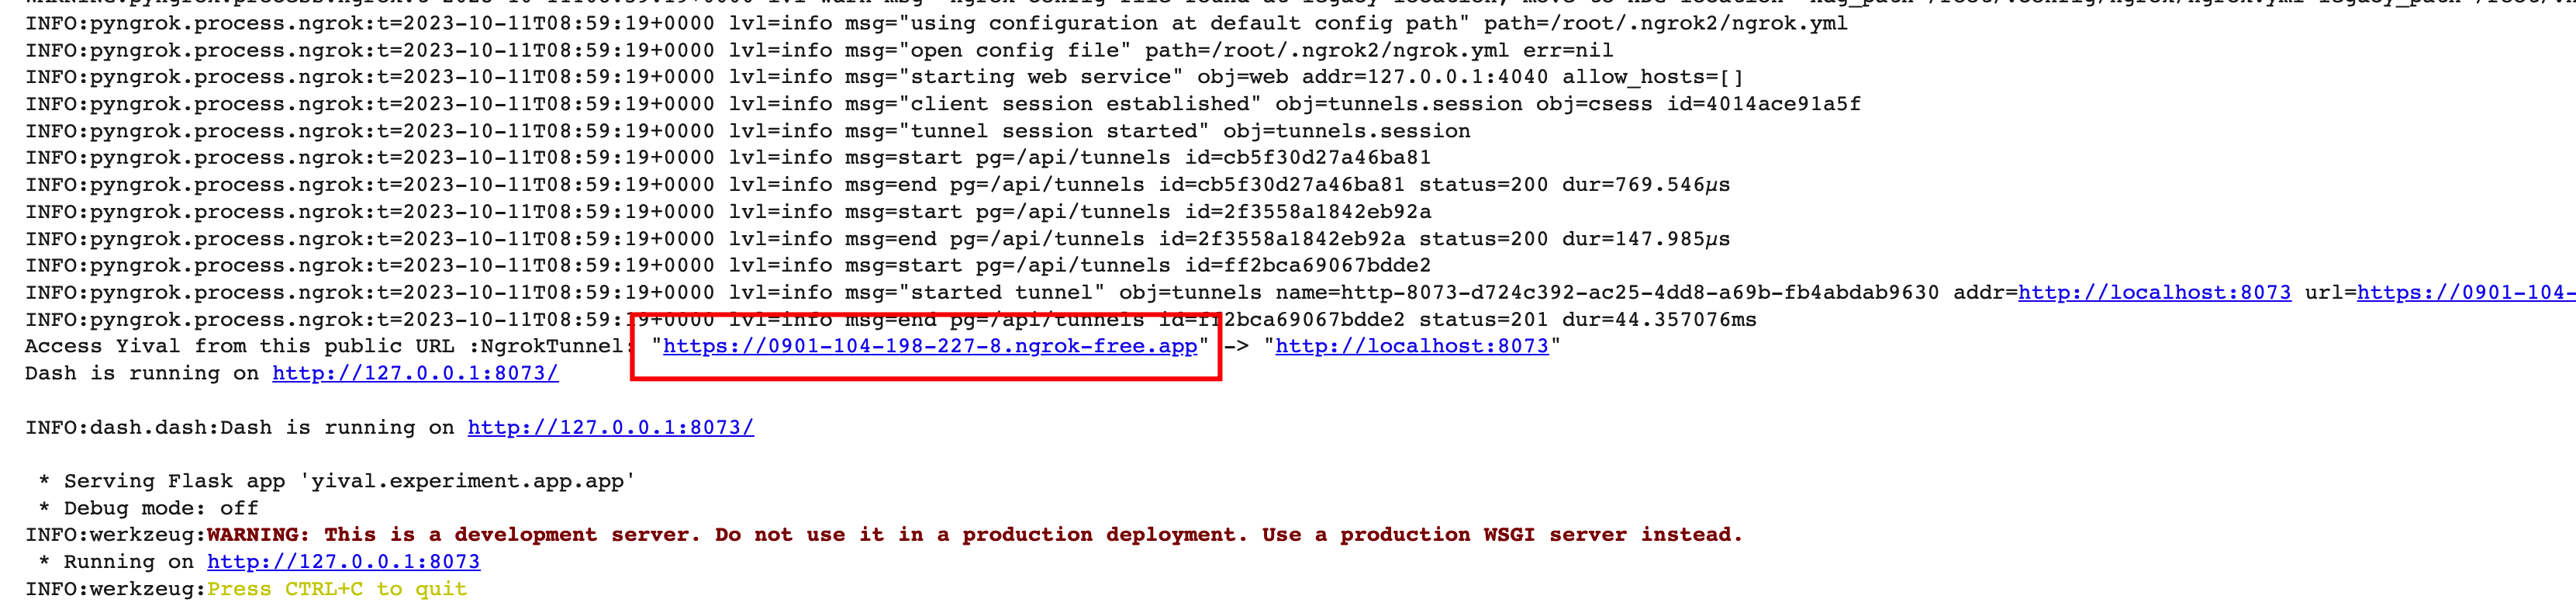

In [ ]:
!poetry run yival run /content/YiVal/demo/configs/headline_generation_improve.yml

## Result example

After launching Yival on web, you can easily check and analysis your experiment results and detailed results as following pictures.

Feel free to explore the results and detailed content of the Yival enhanced prompt on the following page. You'll find it exciting to see the evaluation scores climbing higher and higher!

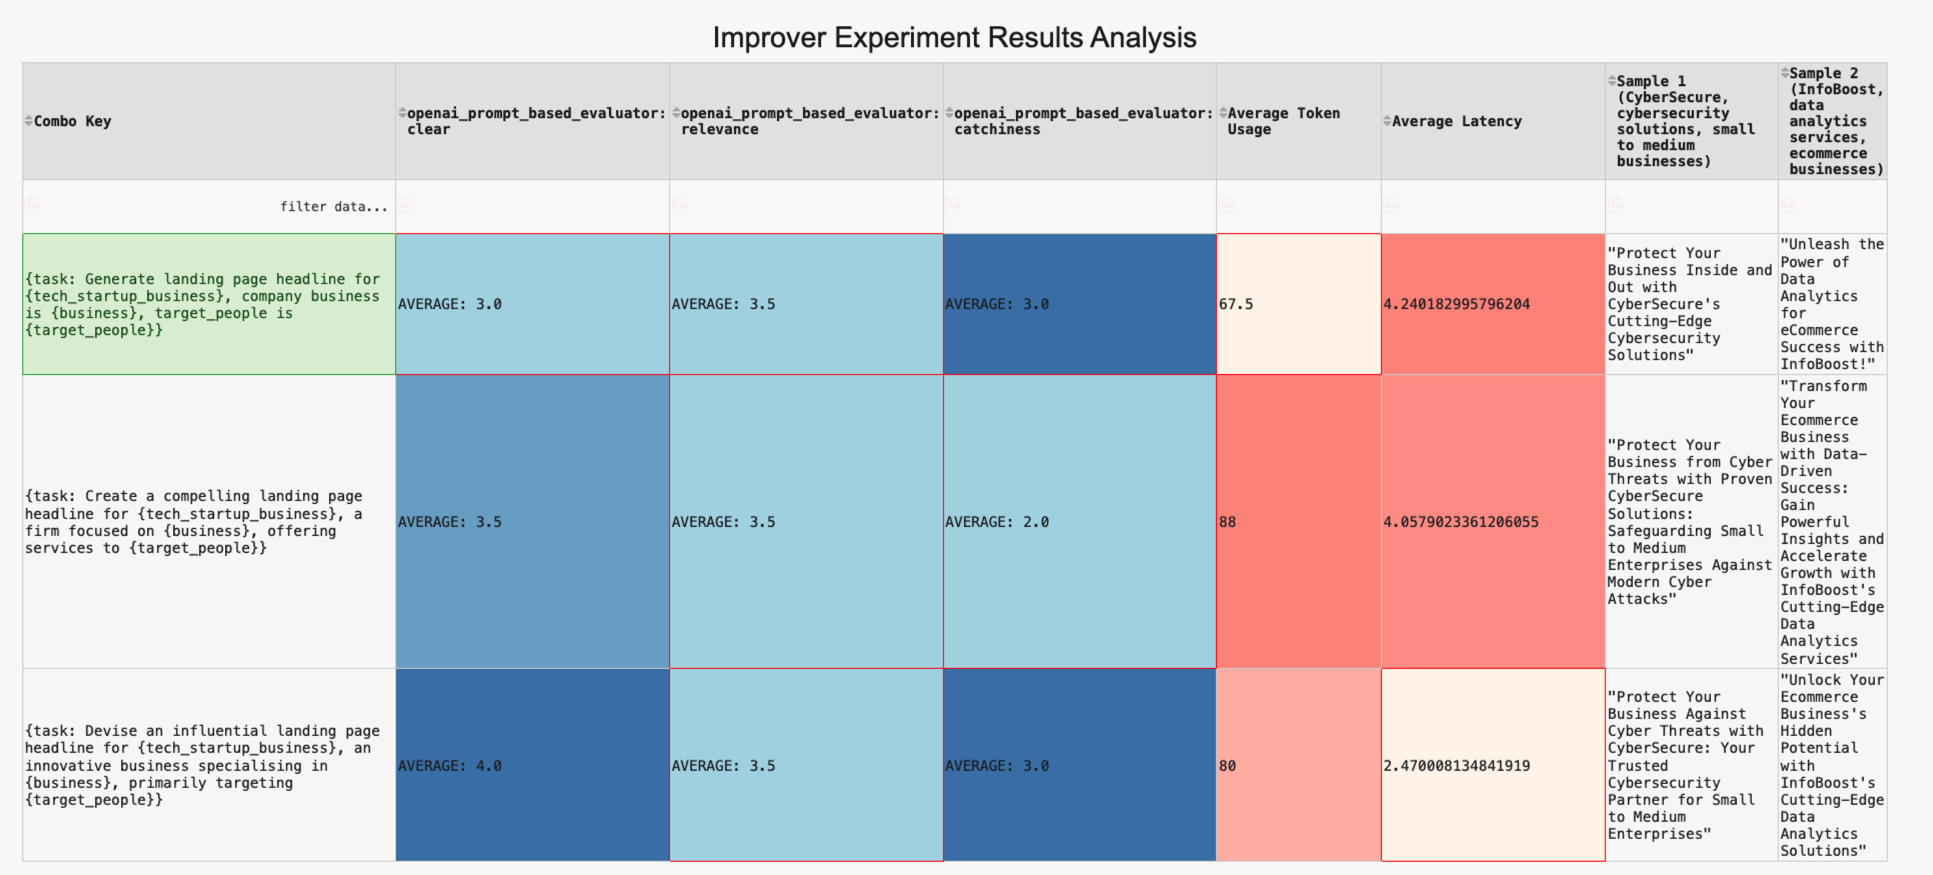

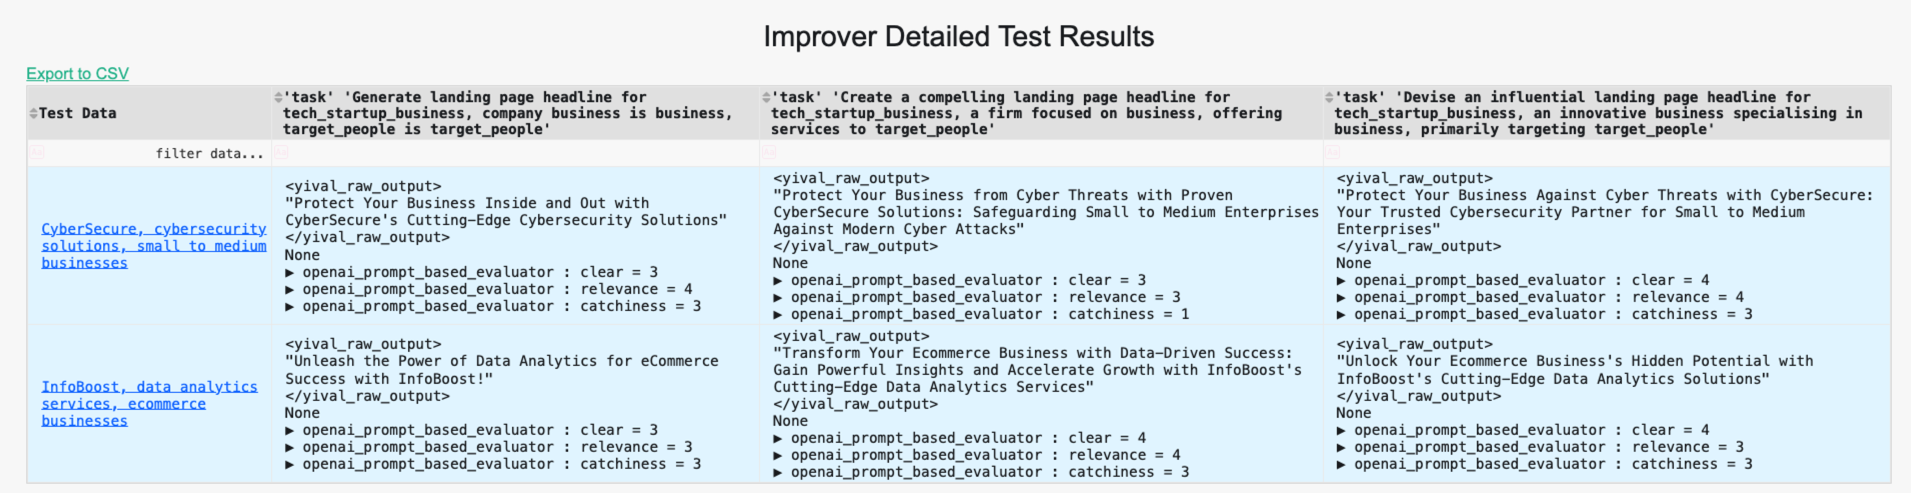

In the same way, you can check out all the prompts and associated data results from the first round of iteration.

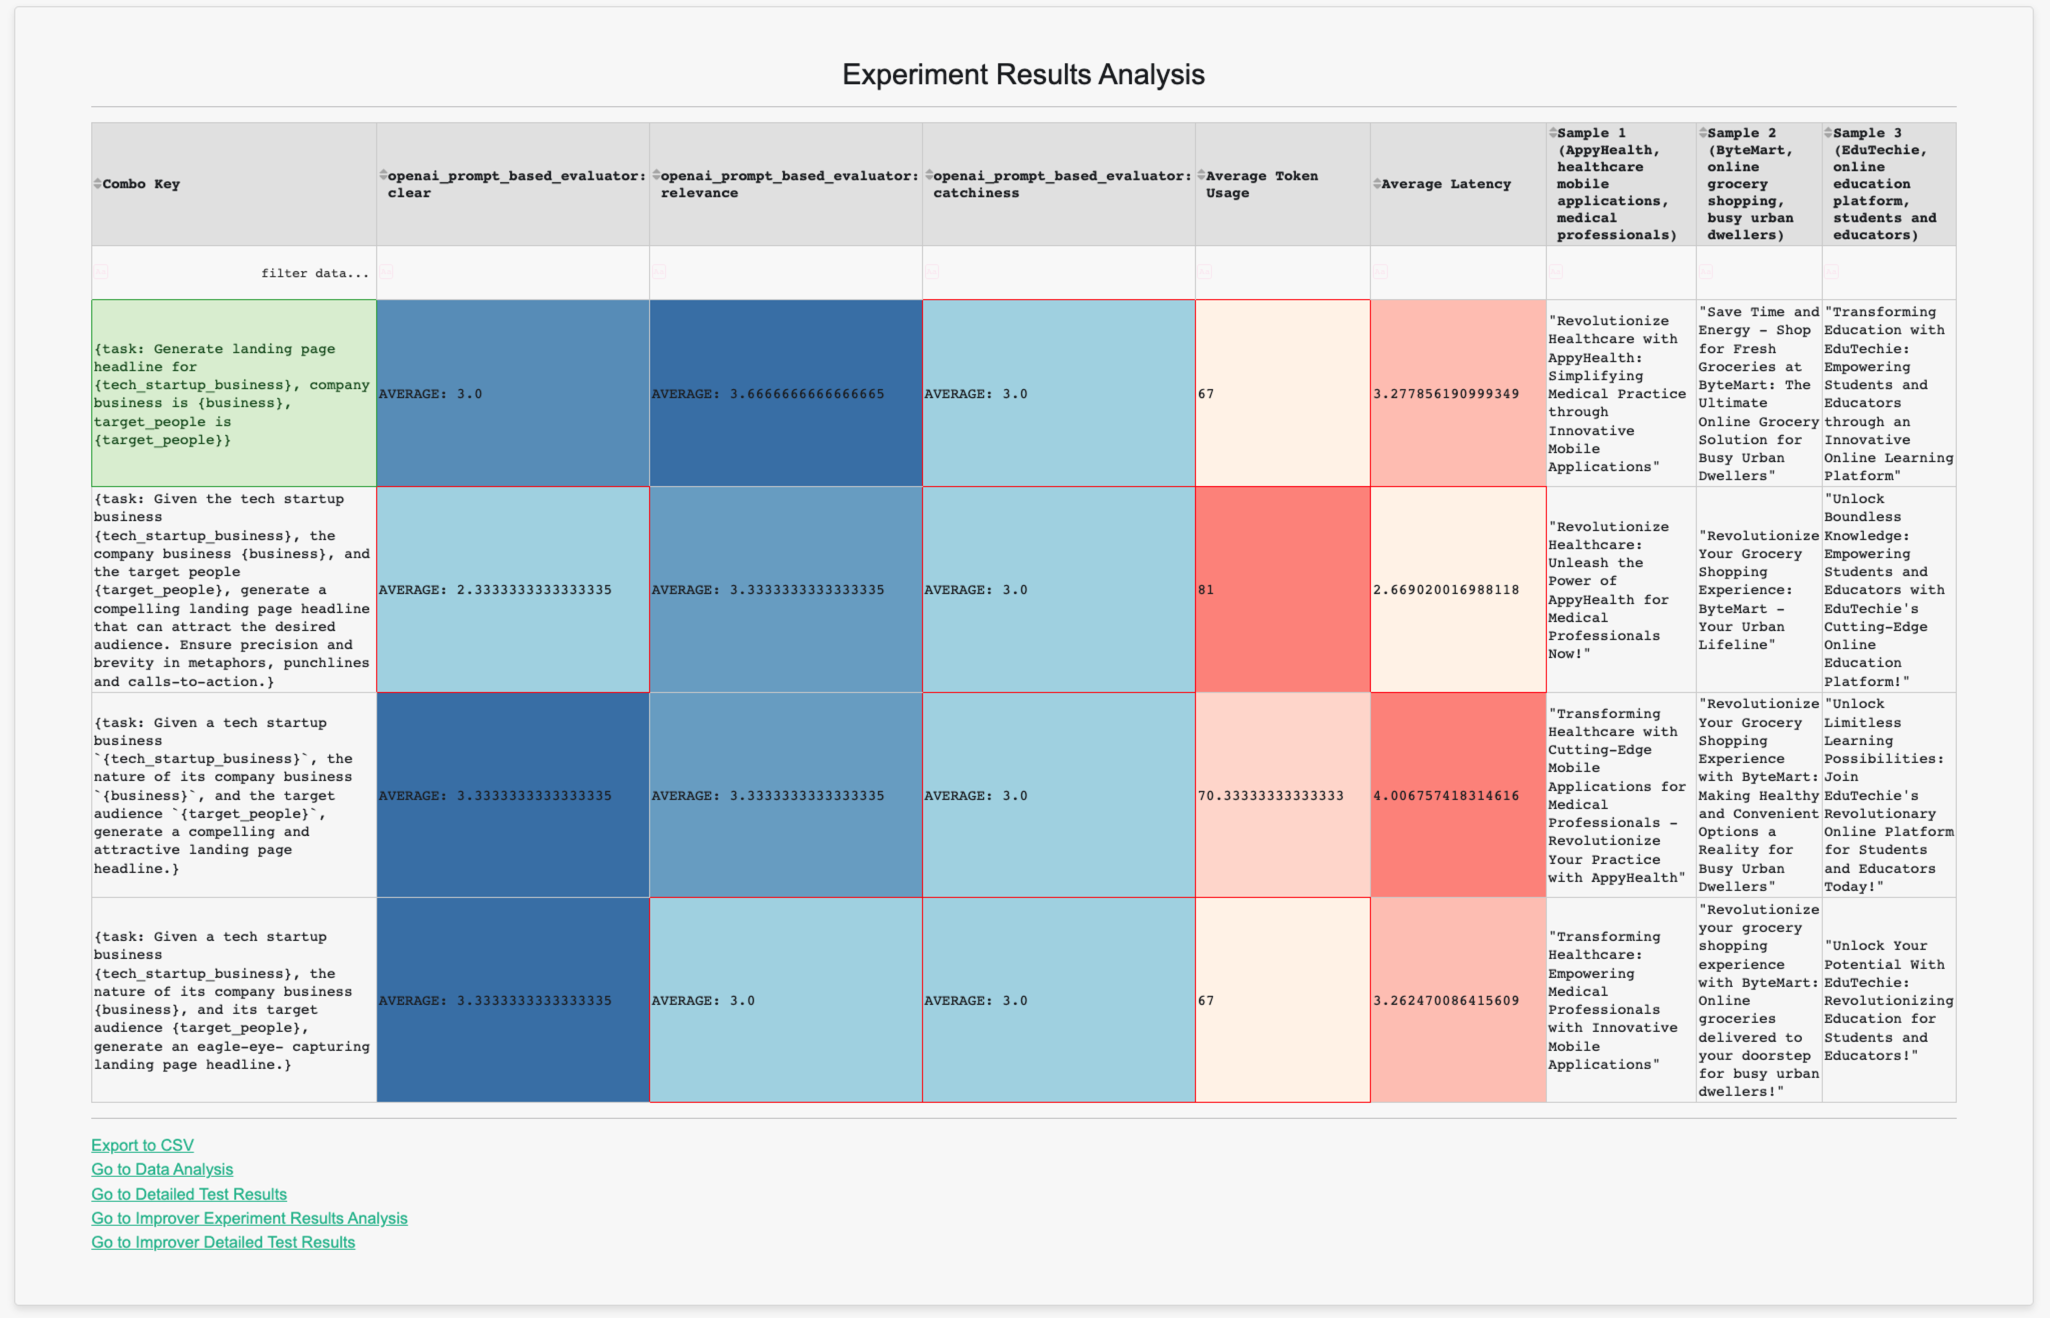

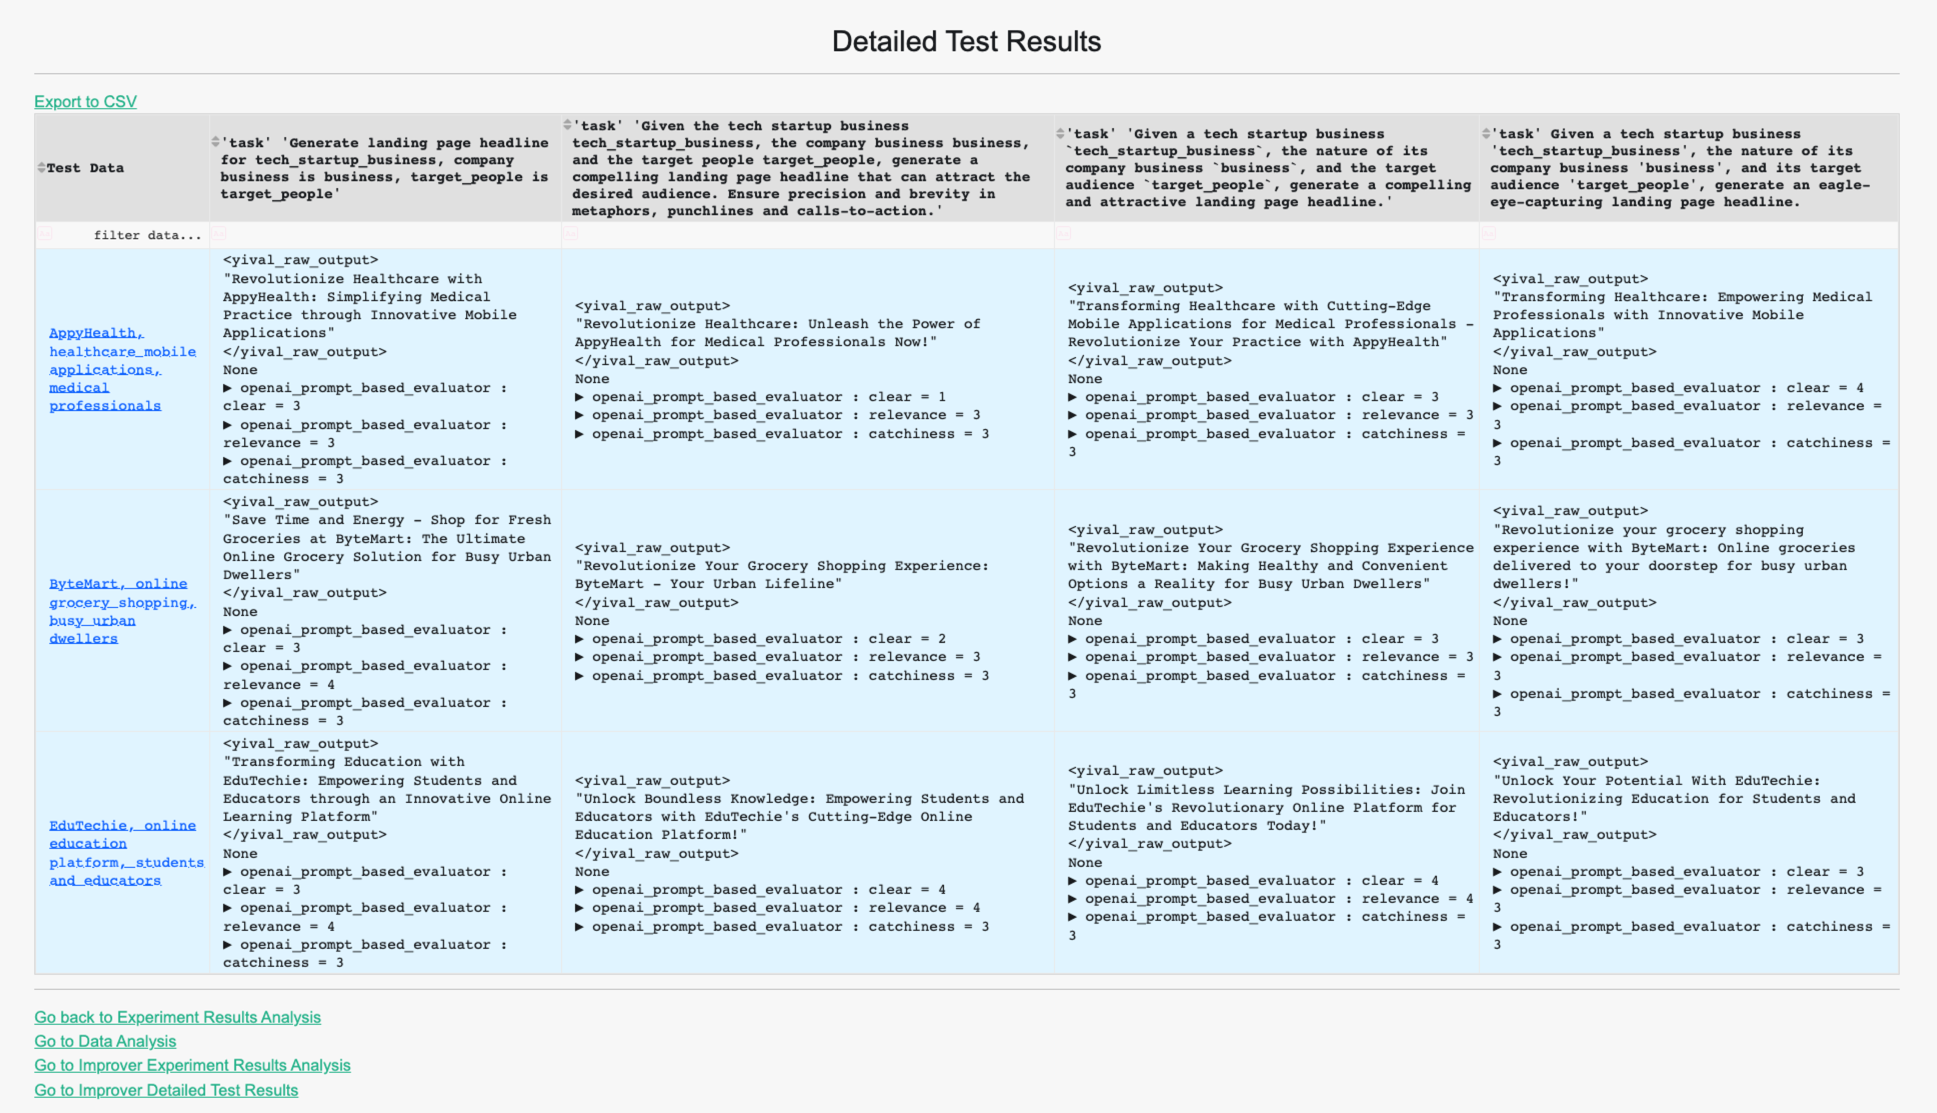

Moreover, we offer an interactive mode that allows you to generate headlines and evaluation results based on user input parameters and combinations. This gives you the freedom to explore new ideas using prompts that have been evaluated and enhanced.

**Here are headlines that our generation bot created for Yival in interactive mode!** 😆

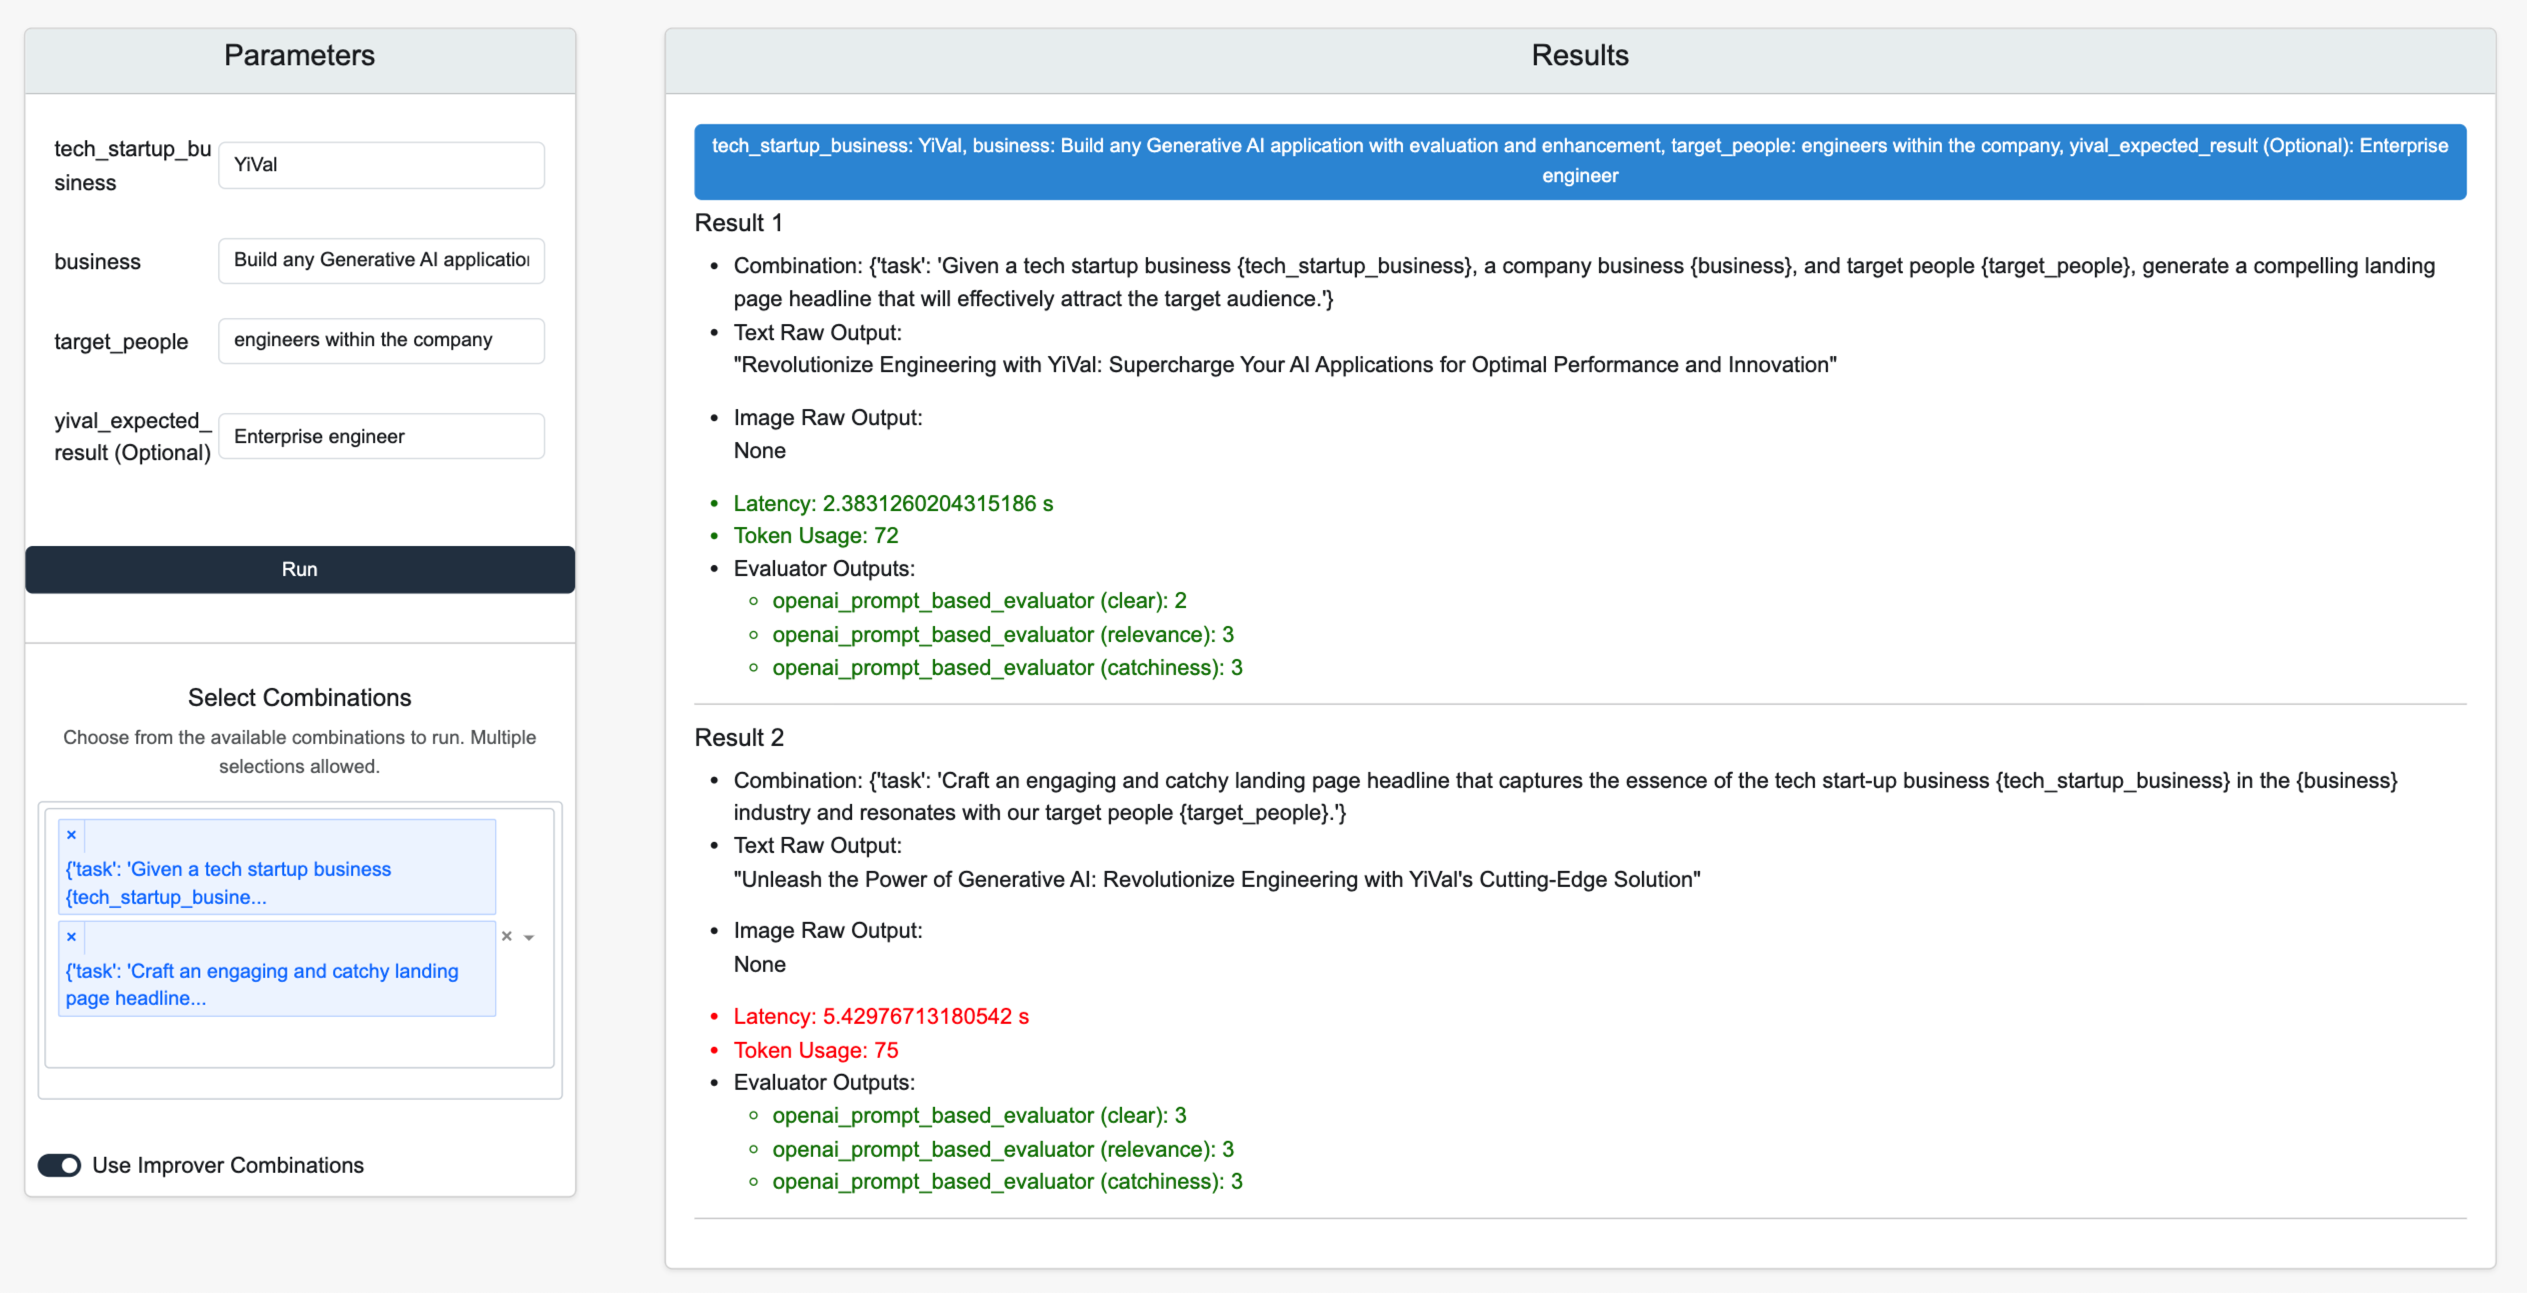

## YiVal Bot

We're taking interactivity to the next level by offering the option to build your own automated chatbot! All you need to do is input the parameters and choose prompts you want, and Yival will takes care of the entire process of generating and evaluating results! 🤖️

Execute the following code and wait for the completion notification of the experiment, indicated by the message: `Running interactive bot mode`.

Please **click the ngrok below** instead of `localhost:8501` since we're going to use ngrok to lanuch the bot!

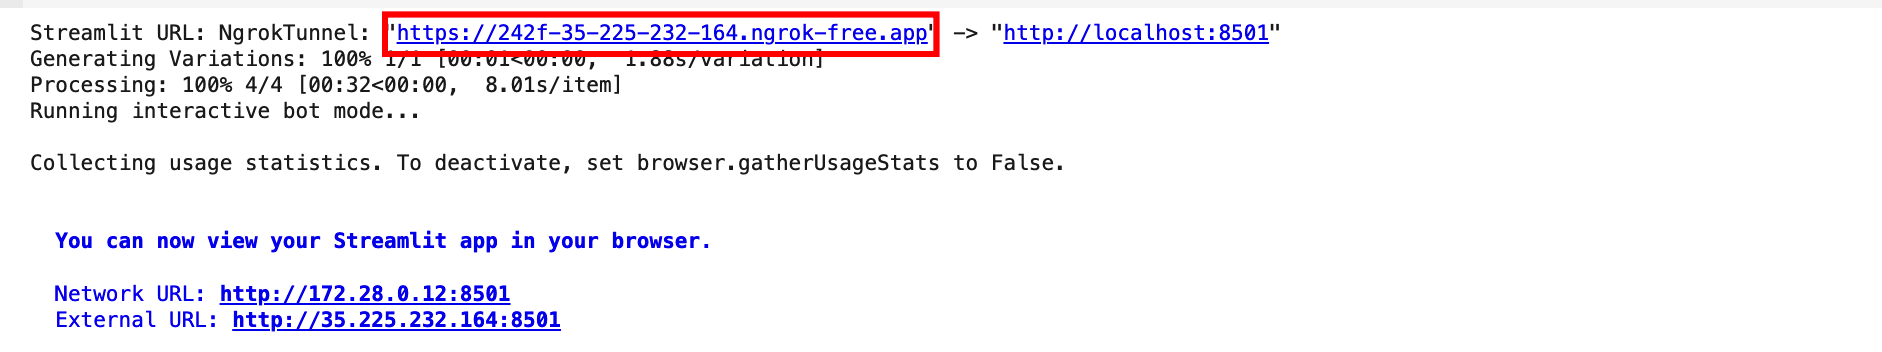

In [ ]:
print("Streamlit URL:", public_url)
!poetry run yival bot /content/YiVal/demo/configs/headline_generation_improve.yml


Here's what the bot's user interface looks like. Just tick the combination you need from the dropdown menu, and then follow the bot's prompts to interact and get your results!

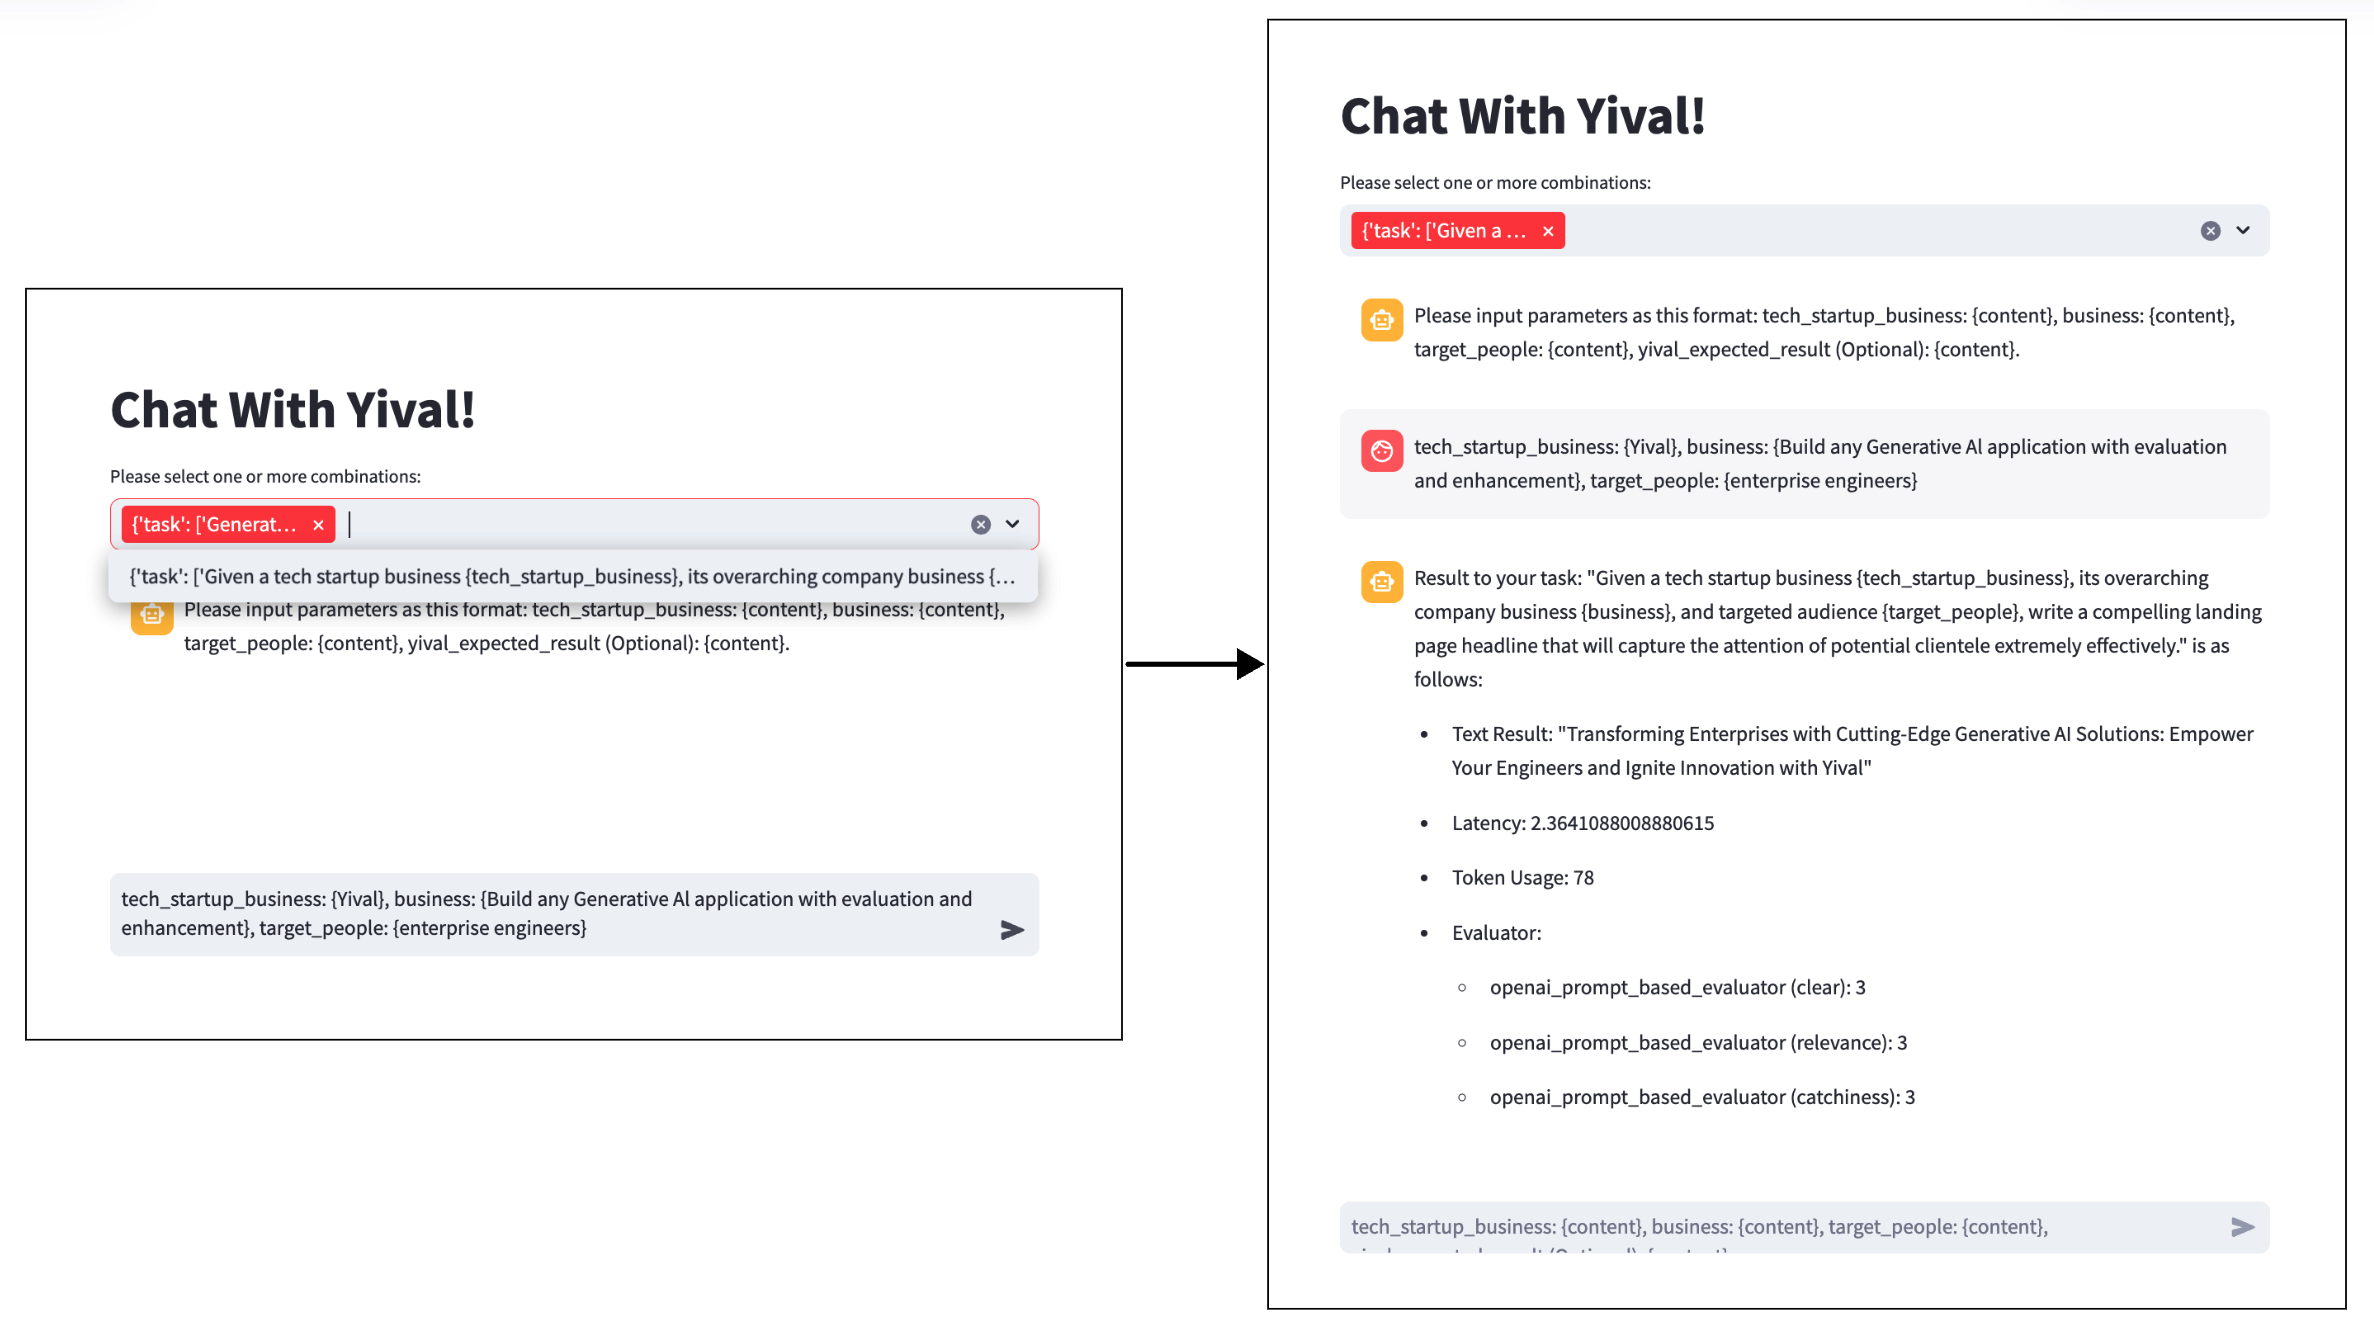